#  Telco Customer Churn Analysis
In this notebook, we build a machine learning model to predict customer churn using the Telco dataset.

## Data Import and Library Setup
We begin by importing the necessary libraries and setting up the environment.

In [4]:
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score , precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import pickle
import seaborn as sns


In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")
plt.style.use("dark_background")


plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 12


## Data Loading
We load the dataset and perform basic inspection.

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
df.TotalCharges.mode()[0]

' '

In [13]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Data Cleaning
We clean the dataset by handling missing or incorrect values.

In [15]:
def fix_total_charges(row):
    if row['TotalCharges'] == ' ':
        return row['MonthlyCharges']
    else:
        return row['TotalCharges']
    
df['TotalCharges'] = df.apply(fix_total_charges, axis=1)

In [16]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

##  1. Data Loading and Initial Inspection
We start by importing required libraries and loading the dataset.

In [21]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [22]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [23]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [24]:
len(df[df['TotalCharges']==' '])

0

In [25]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
len(df[df['TotalCharges']==' '])

0

In [27]:

df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [28]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [29]:
df.columns = df.columns.str.lower()

In [30]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [31]:
df[df.churn == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [32]:
(df.churn == 'Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [33]:
df.churn = (df.churn == 'Yes').astype(int)

In [34]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

## Feature Engineering
We prepare the dataset for modeling by encoding categorical variables and scaling.

##  2. Data Cleaning
Fixing incorrect entries and handling missing values.

In [37]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [38]:
df.churn.value_counts(normalize= True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [39]:
df.churn.mean()

0.2653698707936959

In [40]:

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


In [41]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

count    4507.000000
mean     2237.668715
std      2248.499881
min        18.800000
25%       383.600000
50%      1359.000000
75%      3708.000000
max      8684.800000
Name: totalcharges, dtype: float64


<Axes: >

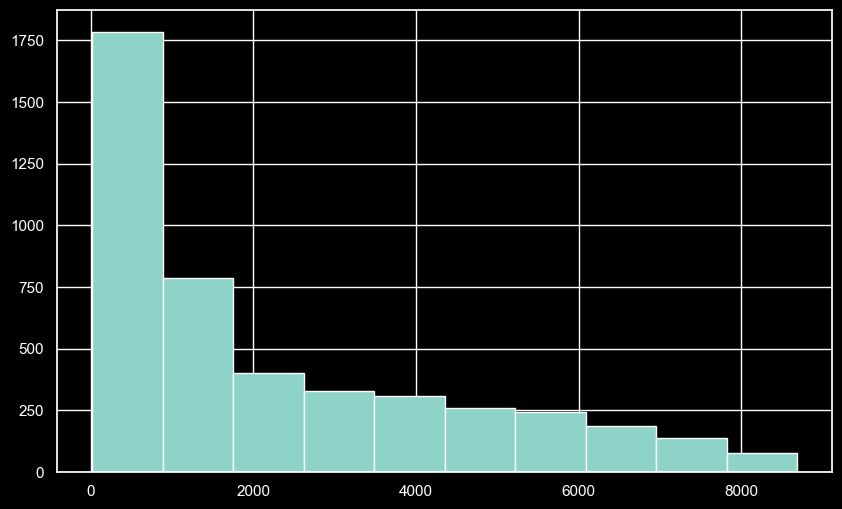

In [42]:
print(df_train['totalcharges'].describe())
df_train['totalcharges'].hist()

In [43]:
df_train.totalcharges.isnull().sum()

0

In [44]:
df_valid.totalcharges.isnull().sum()

0

In [45]:
df_test.totalcharges.isnull().sum()

0

In [46]:
df_train.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [47]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [48]:
numerical.remove('churn')

In [49]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [50]:
df_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

##  3. Exploratory Data Analysis (EDA)
We analyze distributions and relationships to understand key patterns affecting churn.

In [52]:
global_mean = df_train.churn.mean()
round(global_mean, 2)

0.27

In [53]:
df_train.groupby('gender')['churn'].mean()

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

In [54]:
churn_gender = df_train.groupby('gender').churn.mean()
churn_gender

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

In [55]:
churn_partner = df_train.groupby('partner').churn.mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64

In [56]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [57]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64

In [58]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


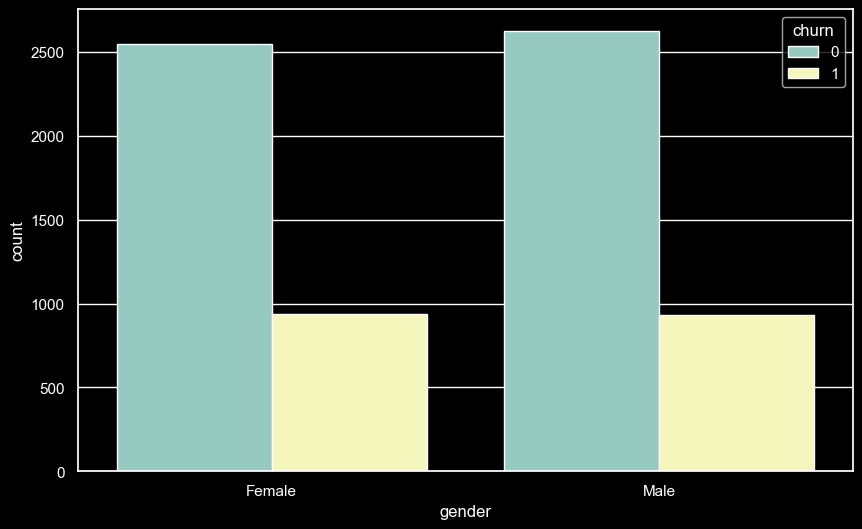

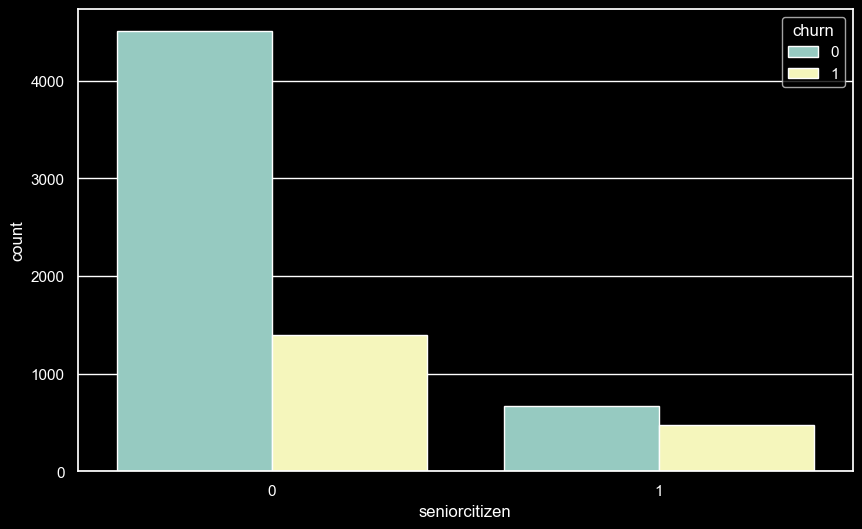

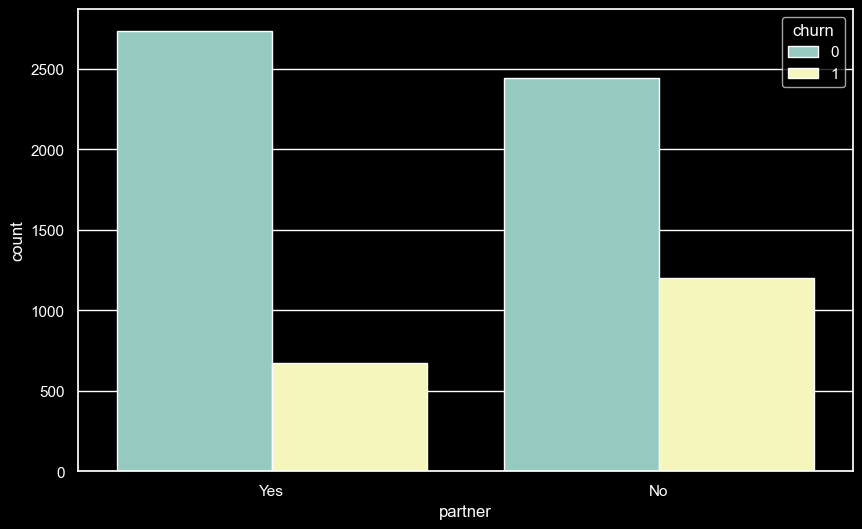

In [59]:
for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

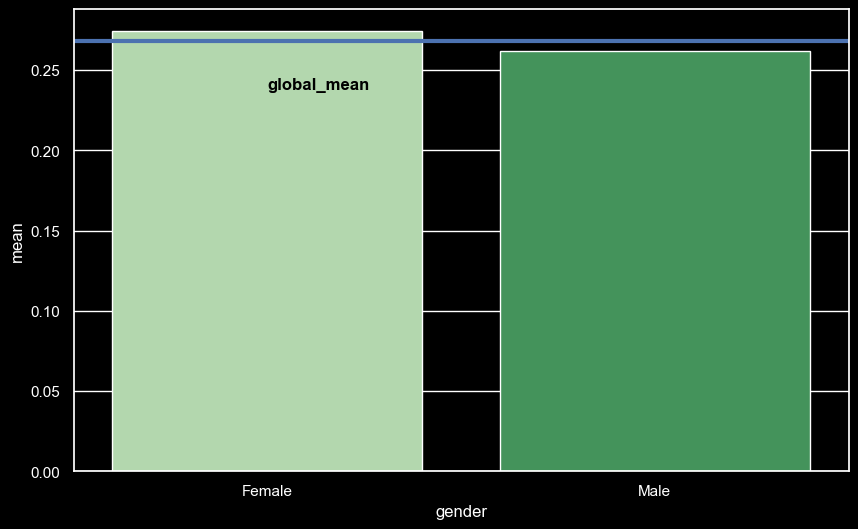

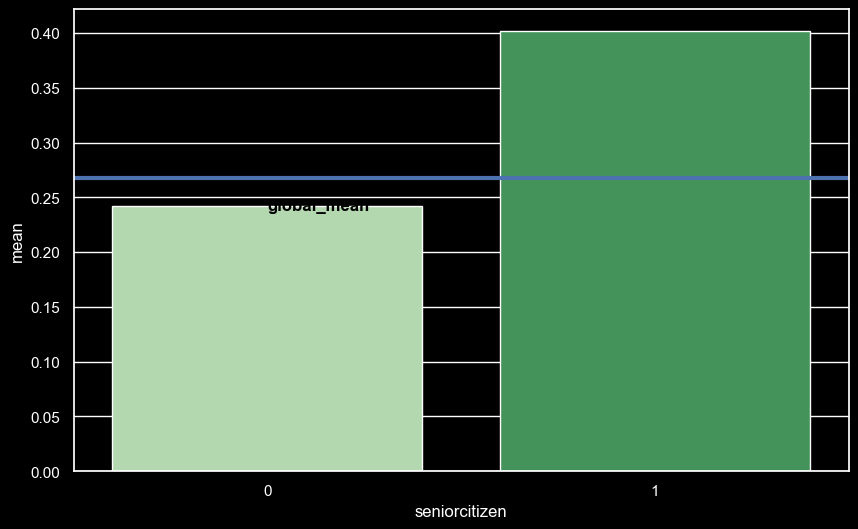

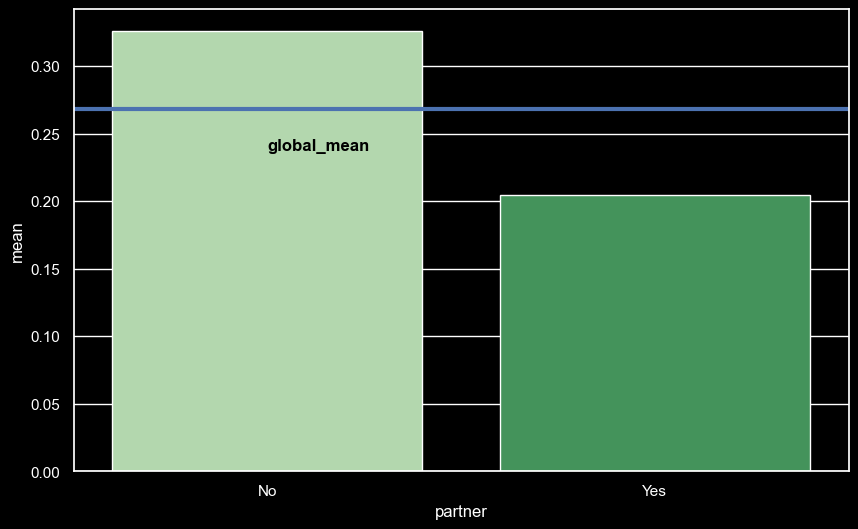

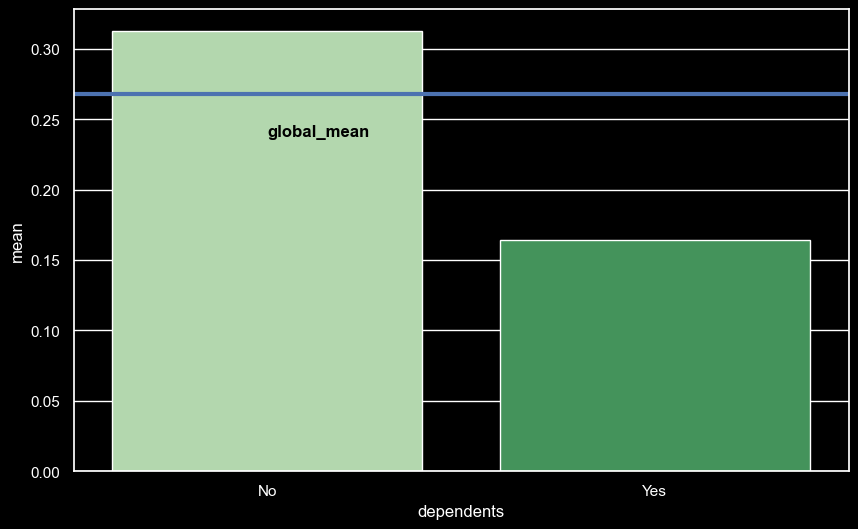

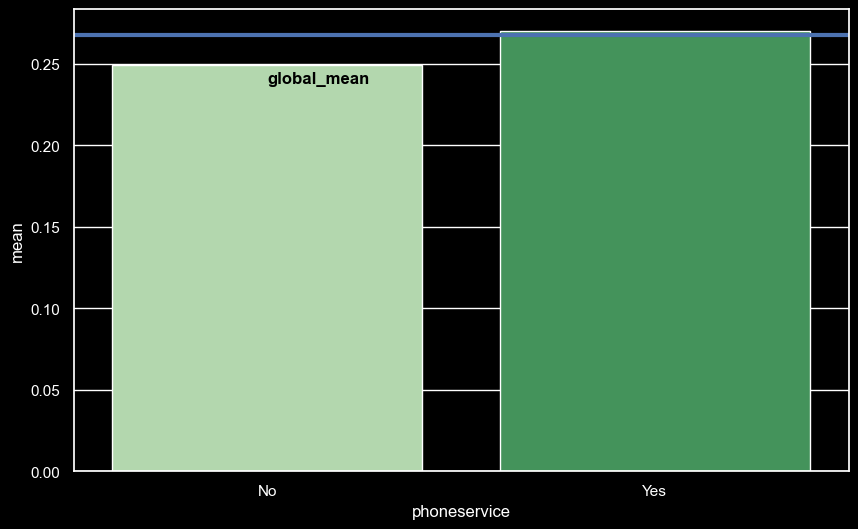

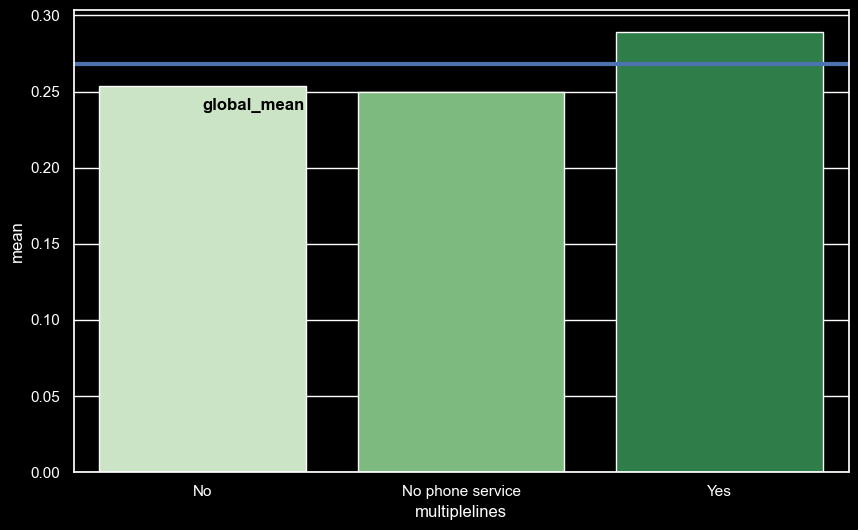

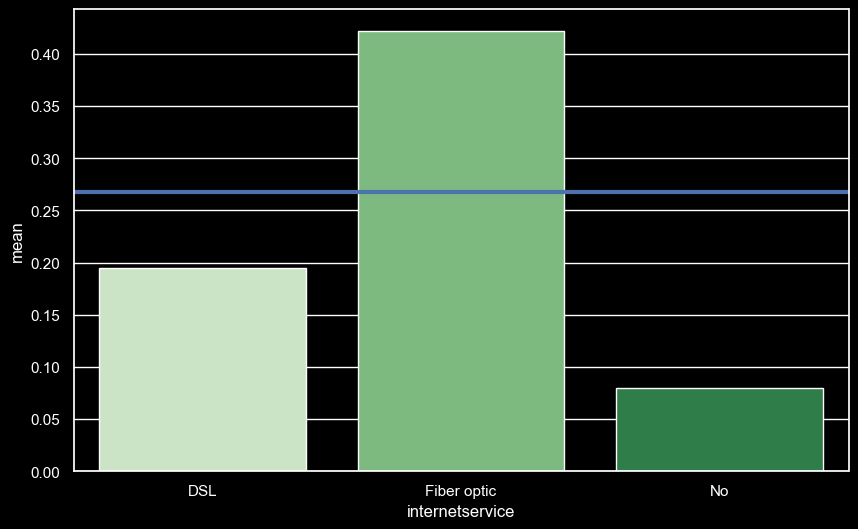

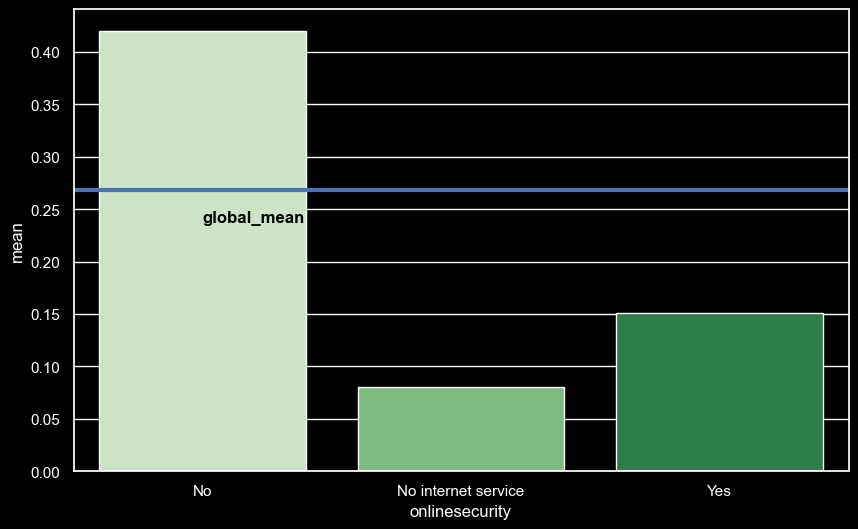

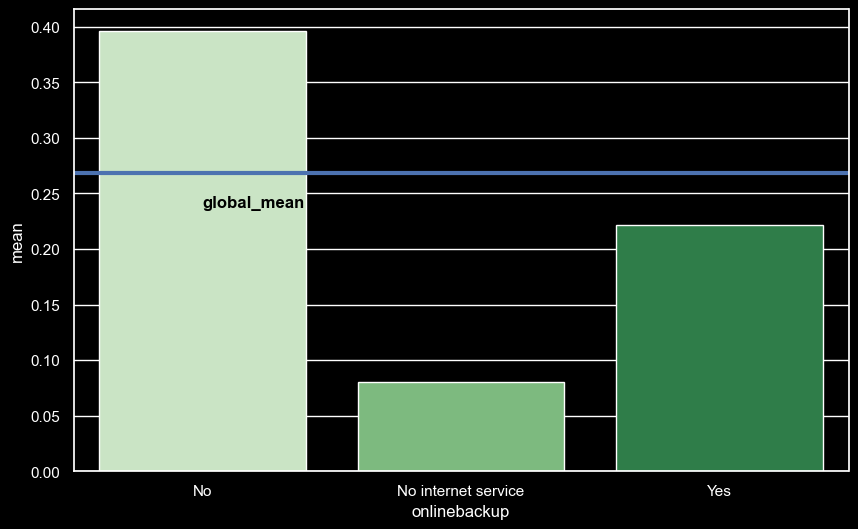

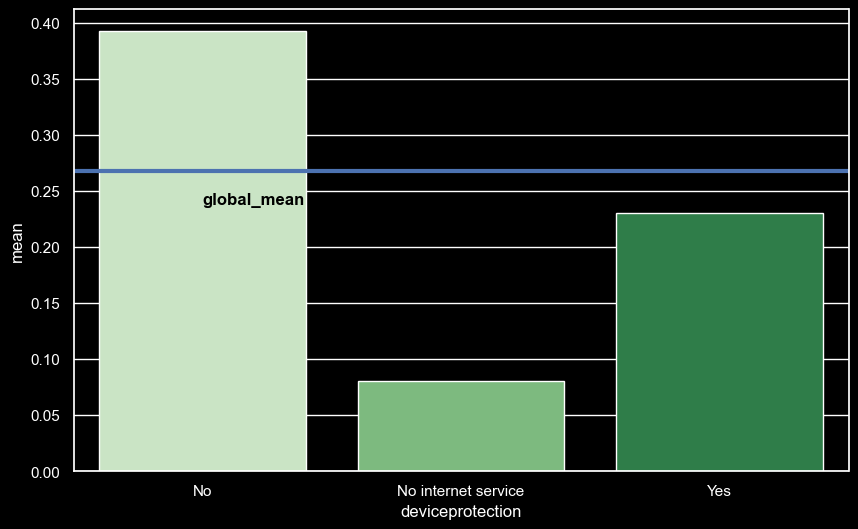

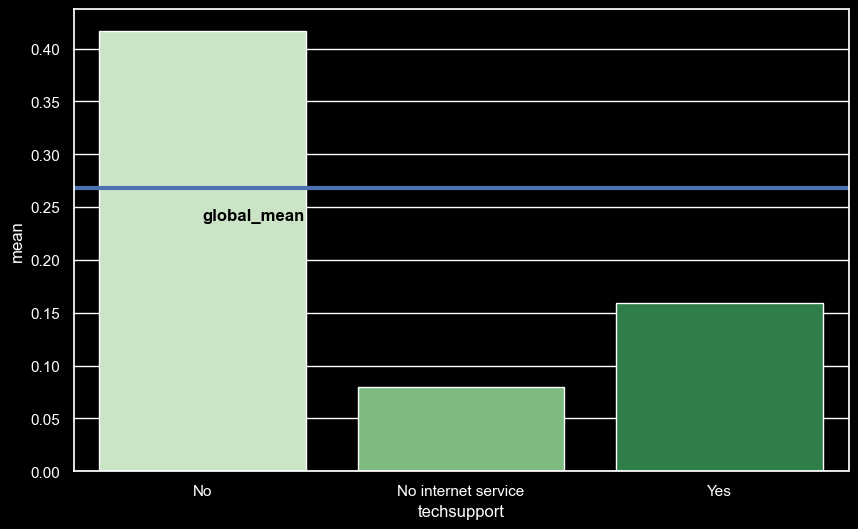

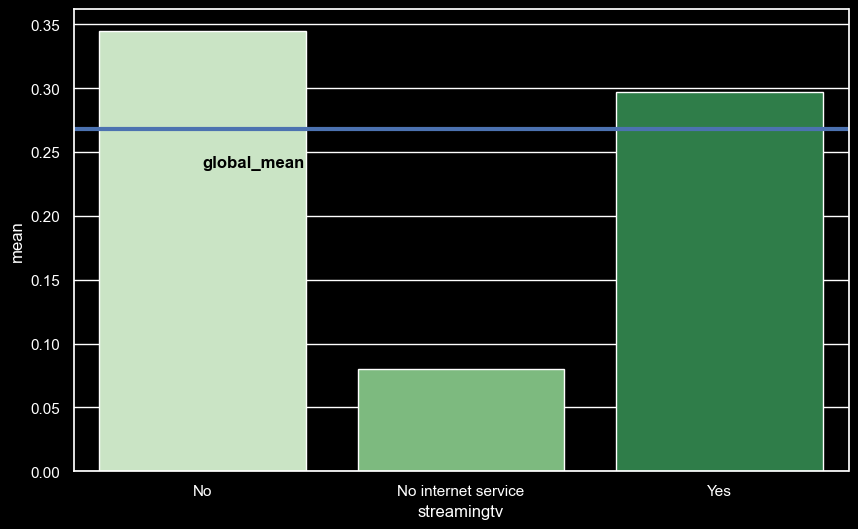

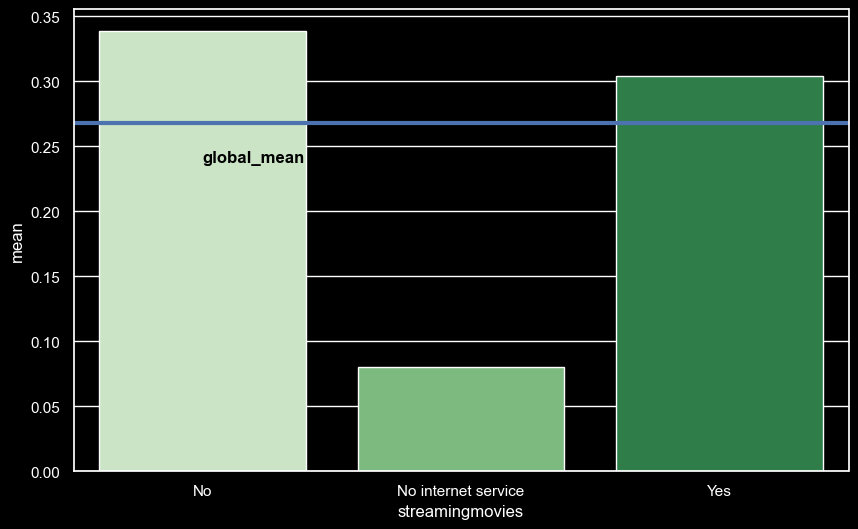

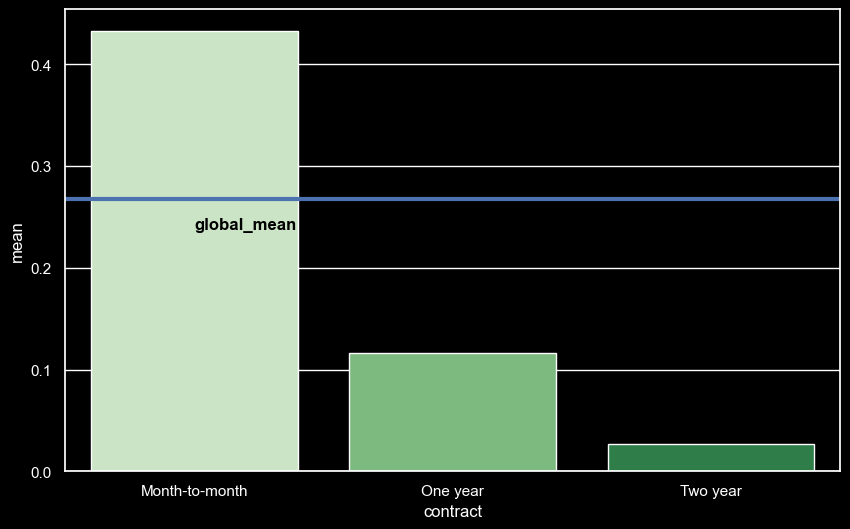

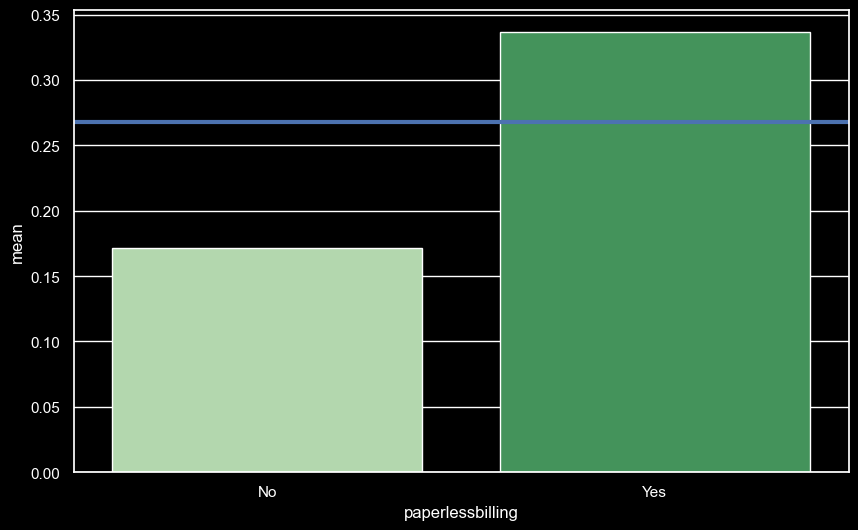

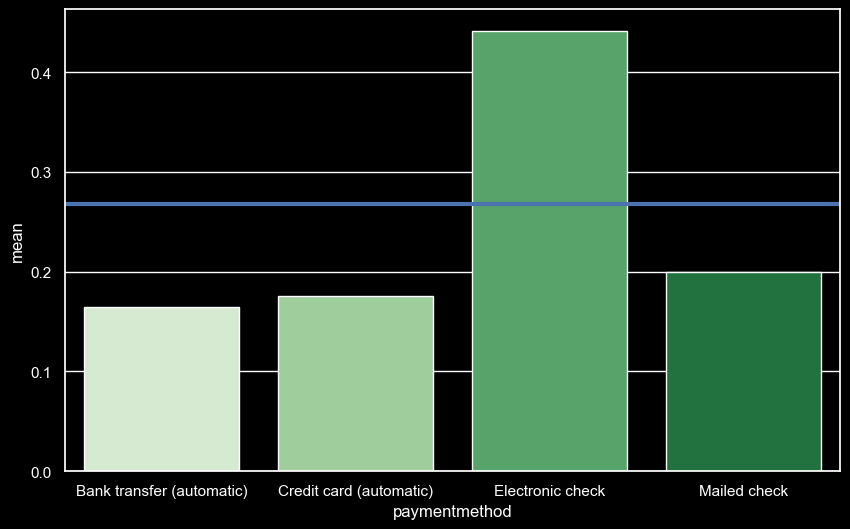

In [60]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

In [61]:

def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


In [62]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198347
dtype: float64

In [63]:
t1 =df[df['tenure'] <= 2].churn.mean()
t1

0.5835266821345708

In [64]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2

0.4033232628398791

In [65]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

0.17490952955367914

##  4. Feature Engineering
We encode categorical variables and scale numeric features to prepare for modeling.

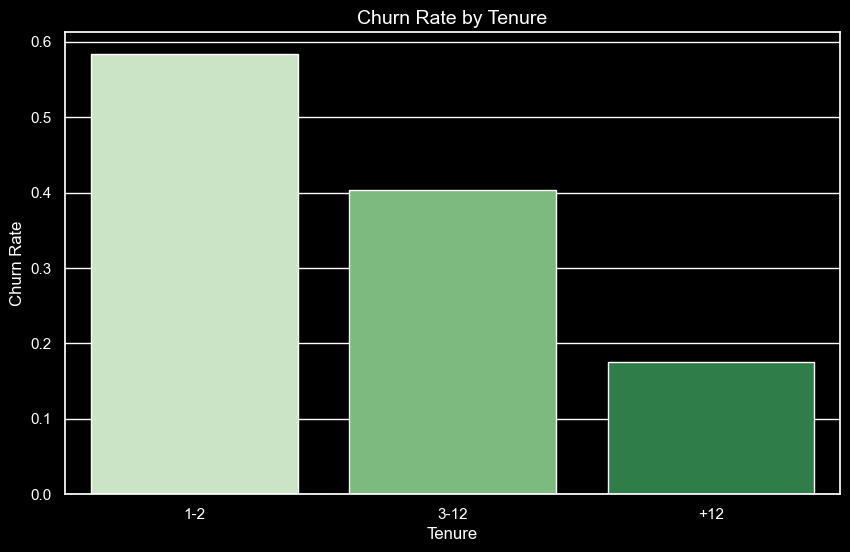

In [67]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

In [68]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

0.08841463414634146

In [69]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

0.22807017543859648

In [70]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

0.3178752107925801

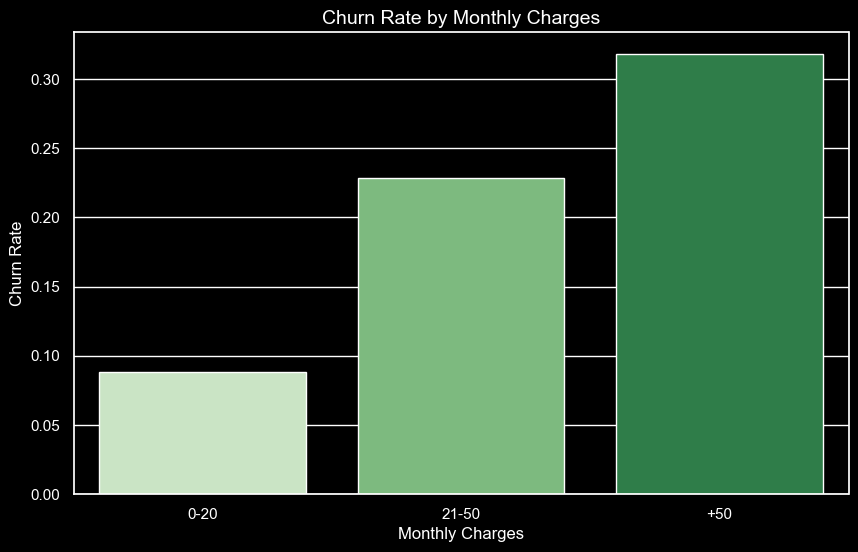

In [71]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

In [72]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

0.36845730027548207

In [73]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

0.2137150466045273

In [74]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

0.13832599118942732

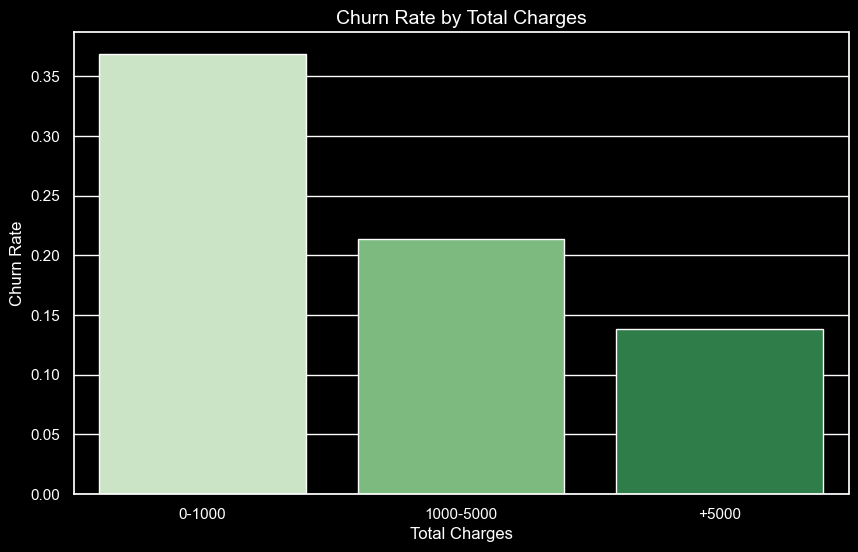

In [75]:
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

## Model Training
We train a Logistic Regression model to predict customer churn.

In [77]:


df_train_enc= pd.get_dummies(df_train, drop_first=True)
df_train_enc.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2678,30,19.70,625.05,0,True,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,True
5594,23,83.75,1849.95,0,False,False,True,True,True,False,...,False,True,False,False,False,False,True,False,True,False
4077,14,95.80,1346.30,0,False,True,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4758,56,19.70,1051.90,0,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
4445,63,98.00,6218.45,0,False,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [78]:



ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
df_train_enc

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [79]:
X_train = df_train_enc.drop('churn', axis=1)
y_train = df_train_enc['churn']

In [80]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = df_valid_enc.drop('churn', axis=1)
y_valid = df_valid_enc['churn']

test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

In [81]:
df_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2237.668715
std,24.558539,30.089423,2248.499881
min,0.000000,18.250000,18.800000
25%,8.000000,34.700000,383.600000
50%,28.000000,70.150000,1359.000000
75%,55.000000,89.575000,3708.000000
max,72.000000,118.350000,8684.800000


##  5. Model Training
We use Logistic Regression to predict churn.

In [83]:
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-0.08151035, -1.48282956, -0.71727718],
       [-0.36657522,  0.64606159, -0.17245353],
       [-0.7330872 ,  1.04657898, -0.39647217],
       ...,
       [-1.22176983,  0.85379883, -0.91076096],
       [-0.20368101, -1.32328737, -0.65638538],
       [-0.93670496,  0.54967152, -0.66096672]])

In [84]:

def preprocess(df_train, df_valid, df_test, num, cat):

    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)

    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [85]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [86]:
X_train

array([[-0.08151035, -1.48282956, -0.71727718, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17245353, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39647217, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91076096, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.65638538, ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66096672, ...,  0.        ,
         1.        ,  0.        ]])

In [87]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

In [88]:
model1 = LogisticRegression(solver='liblinear',random_state=1)
model1.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [89]:
len(columns)

30

In [90]:
len(model1.coef_[0])

30

In [91]:
y_val_pred=model1.predict_proba(X_valid)
y_val_pred

array([[0.99290758, 0.00709242],
       [0.79855561, 0.20144439],
       [0.78733305, 0.21266695],
       ...,
       [0.9616639 , 0.0383361 ],
       [0.4203052 , 0.5796948 ],
       [0.70279084, 0.29720916]])

In [92]:
y_test_pred=model1.predict_proba(X_test)
y_test_pred

array([[0.94336093, 0.05663907],
       [0.91262623, 0.08737377],
       [0.66560115, 0.33439885],
       ...,
       [0.99479487, 0.00520513],
       [0.80573997, 0.19426003],
       [0.39358474, 0.60641526]])

In [93]:
y_test_pred[:,1]

array([0.05663907, 0.08737377, 0.33439885, ..., 0.00520513, 0.19426003,
       0.60641526])

In [94]:
y_test_pred[:,1]>0.5

array([False, False, False, ..., False, False,  True])

In [95]:
y_test_pred=(y_test_pred[:,1]>0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [96]:
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## Model Evaluation
We evaluate the model performance using classification metrics and confusion matrix.

##  6. Evaluation
Evaluate model using metrics like accuracy, precision, recall, F1-score.

In [99]:
y_test_pred==y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [100]:
(y_test_pred==y_test).mean()

0.8076650106458482

In [101]:
print('LogisticRegression Training Accuracy: ', round(model1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.81
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


In [102]:
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [103]:
df_mi.head()

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


In [104]:
X_train,X_valid,X_test,columns=preprocess(df_train,df_valid,df_test,numerical,important_cat)
model2=LogisticRegression(solver='liblinear',random_state=1)
model2.fit(X_train,y_train)
print('LogisticRegression Training Accuracy: ', round(model2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


In [105]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [106]:
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test = df_test[numerical]
model3=LogisticRegression(solver='liblinear',random_state=1)
model3.fit(X_train,y_train)
print('LogisticRegression Training Accuracy: ', round(model3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.79


In [107]:
pickle.dump(model2,open("log_reg.pkl", 'wb'))

In [108]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

In [109]:
df_test[important_cat+numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [110]:
def preprocess_fit(df_train,num,cat):
    ohe=OneHotEncoder(drop='first')
    scaler=StandardScaler()
    transformer=make_column_transformer((scaler,num) , (ohe,cat),remainder='passthrough',verbose_feature_names_out=False)

    transformer.fit(df_train[cat+num])
    return transformer

In [111]:
transformer=preprocess_fit(df_train,numerical,important_cat)

In [112]:
df_test[important_cat+numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

##  7. Business Insights and Recommendations
Based on our analysis, we recommend retention strategies for high-risk customers.

In [114]:
pd.DataFrame(df_test.iloc[10][important_cat+numerical]).T

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
407,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [115]:
x=transformer.transform(pd.DataFrame(df_test.iloc[10][important_cat+numerical]).T)
x

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [116]:
loaded_model.predict(x)

array([0])

In [117]:
y_test.iloc[10]

0

In [118]:
x= df_test.iloc[10][important_cat+numerical].to_dict()
x

{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [119]:
x=pd.DataFrame(x,index=[10])
x

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
10,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [120]:
transformer.transform(x)

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [121]:
pickle.dump(transformer,open("transformer.pkl",'wb'))

In [122]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [123]:
cust = {
 'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45
}

In [124]:
pd.DataFrame(cust,index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [125]:
cust=trans.transform(pd.DataFrame(cust,index=[0]))
cust

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [126]:
model.predict(cust)

array([0])

In [127]:
model.predict_proba(cust)

array([[0.50298272, 0.49701728]])

In [128]:
y_pred = model3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.61      0.45      0.52       348

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



<Axes: >

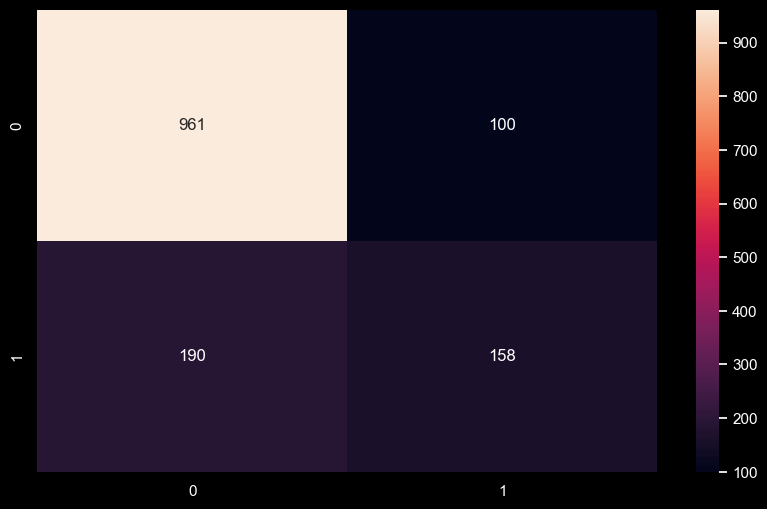

In [129]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0.0f')

In [130]:
cm

array([[961, 100],
       [190, 158]], dtype=int64)

In [131]:
(Tn,Fp),(Fn,Tp)=cm

In [132]:
print('True Negative: ', Tn)
print('False Positive: ', Fp)
print('False Negative: ', Fn)
print('True Positive: ', Tp)

True Negative:  961
False Positive:  100
False Negative:  190
True Positive:  158


In [133]:
print('Acuracy ',accuracy_score(y_pred,y_test))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Acuracy  0.794180269694819
Precision:  0.6124031007751938
Recall:  0.4540229885057471
F1-Score:  0.5214521452145214


In [134]:
print('precision: ',precision_score(y_test, y_pred,pos_label=0))

precision:  0.8349261511728931


In [135]:
print('precision: ',precision_score(y_test, y_pred,average='weighted'))

precision:  0.7799665901094444


## Conclusion
We summarize the findings and suggest possible improvements.